In [17]:
!pip install langchain langchain-core langchain_community langgraph langchain-huggingface transformers torch

In [ ]:
# #!pip install unstructured

# from langchain_community.document_loaders import UnstructuredURLLoader

# urls = ['https://langchain-ai.github.io/langgraph/tutorials/introduction/']
# loader = UnstructuredURLLoader(urls=urls)
# docs = loader.load()


In [7]:
#!pip install unstructured

from langchain_community.document_loaders import UnstructuredURLLoader

urls = ['https://sunnah.com/bukhari/1']
loader = UnstructuredURLLoader(urls=urls)
docs = loader.load()


In [8]:
docs

[Document(metadata={'source': 'https://sunnah.com/bukhari/1'}, page_content='Contribute to our mission Donate Now\n\nQur\'an | Sunnah | Prayer Times | Audio\n\ntoggle Light Thme\n\ntoggle Dark Thme\n\nSelect Collections\n\nSahih al-Bukhari\n\nSahih Muslim\n\nSunan an-Nasa\'i\n\nSunan Abi Dawud\n\nJami` at-Tirmidhi\n\nSunan Ibn Majah\n\nMuwatta Malik\n\nMusnad Ahmad\n\nSunan ad-Darimi\n\nAn-Nawawi\'s 40 Hadith\n\nRiyad as-Salihin\n\nAl-Adab Al-Mufrad\n\nAsh-Shama\'il Al-Muhammadiyah\n\nMishkat al-Masabih\n\nBulugh al-Maram\n\nCollections of Forty\n\nHisn al-Muslim\n\nShow More Collections\n\nQuotes e.g. "pledge allegiance" Searches for the whole phrase instead of individual words\n\nWildcards e.g. test* Matches any set of one or more characters. For example test* would result in test, tester, testers, etc.\n\nFuzzy Search e.g. swore~ Finds terms that are similar in spelling. For example swore~ would result in swore, snore, score, etc.\n\nTerm Boosting e.g. pledge^4 hijrah Boosts words w

In [9]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
all_splits = text_splitter.split_documents(docs)

print("Total number of documents: ",len(all_splits))

Total number of documents:  44


In [10]:
all_splits[7]

Document(metadata={'source': 'https://sunnah.com/bukhari/1'}, page_content='The commencement of the Divine Inspiration to Allah\'s Messenger (ﷺ) was in the form of good dreams which came true like bright daylight, and then the love of seclusion was bestowed upon him. He used to go in seclusion in the cave of Hira where he used to worship (Allah alone) continuously for many days before his desire to see his family. He used to take with him the journey food for the stay and then come back to (his wife) Khadija to take his food likewise again till suddenly the Truth descended upon him while he was in the cave of Hira. The angel came to him and asked him to read. The Prophet (ﷺ) replied, "I do not know how to read." The Prophet (ﷺ) added, "The angel caught me (forcefully) and pressed me so hard that I could not bear it any more. He then released me and again asked me to read and I replied, \'I do not know how to read.\' Thereupon he caught me again and pressed me a second time till I could

In [12]:

# Embedding models: https://python.langchain.com/v0.1/docs/integrations/text_embedding/

# Let's load the Hugging Face Embedding class.  sentence_transformers
from langchain_community.embeddings import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings()

vector = embeddings.embed_query("hello, world!")
vector[:5]

/tmp/ipykernel_49741/3361409261.py:5: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = HuggingFaceEmbeddings()
/home/ahmad10raza/anaconda3/envs/Gen_AI/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[0.03492264822125435,
 0.018830053508281708,
 -0.017854735255241394,
 0.00013885335647501051,
 0.0740736573934555]

In [14]:
#!pip install langchain_chroma

from langchain_chroma import Chroma
from langchain_core.documents import Document

vectorstore = Chroma.from_documents(documents=all_splits, embedding=HuggingFaceEmbeddings())

# if you want to store chromadb locally

# vectorstore = Chroma.from_documents(
#     documents=docs,
#     embedding=HuggingFaceEmbeddings(),
#     persist_directory="./my_chroma_db"  # Custom directory
# )


# Loading the Database Later
# This reloads the previously stored embeddings so you don’t have to recompute them.

# vectorstore = Chroma(
#     persist_directory="./my_chroma_db",
#     embedding_function=HuggingFaceEmbeddings()
# )

/tmp/ipykernel_49741/4288330488.py:6: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  vectorstore = Chroma.from_documents(documents=all_splits, embedding=HuggingFaceEmbeddings())


In [ ]:
from langchain_huggingface import HuggingFacePipeline
from langchain.prompts import PromptTemplate
from transformers import pipeline
from langchain_core.output_parsers import StrOutputParser
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer


#model_id = "meta-llama/Meta-Llama-3-8B"
model_id = "tiiuae/falcon-7b"

# text_generation_pipeline = pipeline(
#     "text-generation", model=model_id, model_kwargs={"torch_dtype": torch.bfloat16}, max_new_tokens=400, device=0)


text_generation_pipeline = pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={"torch_dtype": torch.bfloat16},
    max_new_tokens=200,
    device=0,
    temperature=0.7,  #  (lower values = more deterministic)
    top_k=50,  # Filters out low-probability tokens
)


llm = HuggingFacePipeline(pipeline=text_generation_pipeline)



Fetching 2 files:   0%|          | 0/2 [09:15<?, ?it/s]


In [10]:
# from langchain_core.prompts import PromptTemplate

# template = """Use the following pieces of context to answer the question at the end.
# If you don't know the answer, just say that you don't know, don't try to make up an answer.
# Use three sentences maximum and keep the answer as concise as possible.
# Always say "thanks for asking!" at the end of the answer.

# {context}

# Question: {question}

# Helpful Answer:"""
# prompt = PromptTemplate.from_template(template)


from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

/usr/local/lib/python3.11/dist-packages/langsmith/client.py:253: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


In [11]:
from typing_extensions import List, TypedDict

# Define state for application
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str


In [12]:
# Define application steps
def retrieve(state: State):
    retrieved_docs = vectorstore.similarity_search(state["question"],  k=1)
    return {"context": retrieved_docs}



In [13]:
def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content})
    response = llm.invoke(messages)
    #return {"answer": response.content}
    return {"answer": response}



In [14]:
from langgraph.graph import START, StateGraph

# Compile application and test
graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

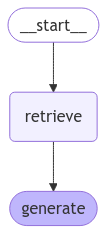

In [15]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [16]:
response = graph.invoke({"question": "what is langgraph?"})
print(response["answer"])

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:11 for open-end generation.


Human: You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: what is langgraph? 
Context: Thank you for your patience. I've found some recent information about LangGraph for you. Let me summarize the key points:

1. LangGraph is part of the LangChain ecosystem, which is a leading platform in AI development.

2. Recent updates and features of LangGraph include:

   a. LangGraph Cloud: This seems to be a cloud-based version of LangGraph, though specific details weren't provided in the search results.

   b. LangGraph Platform: This is a newly introduced concept that combines several offerings:
      - LangGraph Server
      - LangGraph Studio
      - CLI (Command Line Interface)
      - SDK (Software Development Kit)

3. LangGraph Server: This component has received new features to enhance its val